<a href="https://colab.research.google.com/github/harshith-coder/GENAI-2025/blob/main/lab_9_1(genai).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1146 - loss: 2.3121 - val_accuracy: 0.1248 - val_loss: 2.3019
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1278 - loss: 2.2992 - val_accuracy: 0.1408 - val_loss: 2.2891
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1415 - loss: 2.2889 - val_accuracy: 0.1597 - val_loss: 2.2763
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1636 - loss: 2.2752 - val_accuracy: 0.1790 - val_loss: 2.2633
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1851 - loss: 2.2614 - val_accuracy: 0.1990 - val_loss: 2.2500
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2027 - loss: 2.2490 - val_accuracy: 0.2208 - val_loss: 2.2361
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2268 - loss: 2.2345 - val_accuracy: 0.2418 - val_loss: 2.2216
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2534 - loss: 2.2196 - val_accuracy: 0.

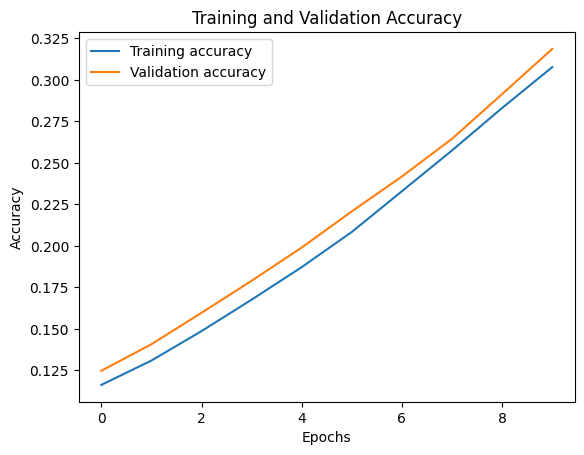

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1617 - loss: 2.2957 - val_accuracy: 0.1906 - val_loss: 2.2789
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1931 - loss: 2.2756 - val_accuracy: 0.2169 - val_loss: 2.2582
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2218 - loss: 2.2547 - val_accuracy: 0.2433 - val_loss: 2.2364
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2499 - loss: 2.2312 - val_accuracy: 0.2671 - val_loss: 2.2133
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2738 - loss: 2.2085 - val_accuracy: 0.2896 - val_loss: 2.1886
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2977 - loss: 2.1835 - val_accuracy: 0.3151 - val_loss: 2.1622
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3213 - loss: 2.1578 - val_accuracy: 0.3443 - val_loss: 2.1341
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3482 - loss: 2.1288 - val_accuracy: 0.

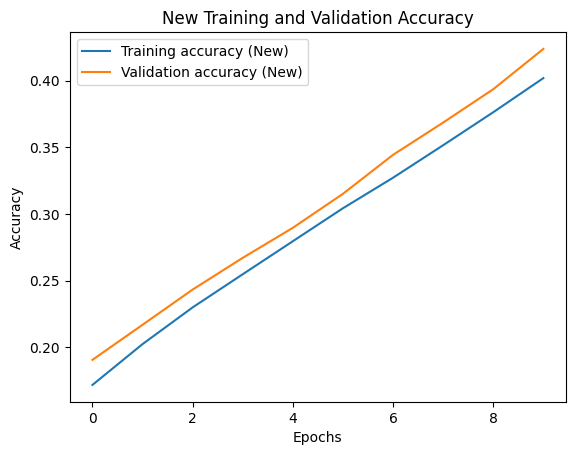

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# 1. Load and prepare the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data (scale between 0 and 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images from 28x28 to 784-dimensional vectors
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 2. Design a basic ANN architecture as per Tabela 1
model = models.Sequential()

# Input layer (784 neurons for each pixel in the image)
model.add(layers.InputLayer(input_shape=(28*28,)))

# Hidden Layer 1
model.add(layers.Dense(32, activation='relu'))

# Hidden Layer 2
model.add(layers.Dense(32, activation='relu'))

# Hidden Layer 3
model.add(layers.Dense(32, activation='relu'))

# Output Layer (10 neurons for 10 digit classes)
model.add(layers.Dense(10, activation='softmax'))

# 3. Compile the model with the specified parameters (optimizer, loss, and metric)
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Train the model (Train for 10 epochs and use batch size 128)
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# 5. Evaluate the model on the test data to calculate accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# 6. Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#7:
# New model with different architecture
new_model = models.Sequential()
new_model.add(layers.InputLayer(input_shape=(28*28,)))
new_model.add(layers.Dense(64, activation='relu'))  # Increased number of neurons
new_model.add(layers.Dense(128, activation='relu'))  # Increased number of neurons
new_model.add(layers.Dense(64, activation='relu'))  # Increased number of neurons
new_model.add(layers.Dense(10, activation='softmax'))  # Output layer

# Compile and train the new model
new_model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
new_history = new_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the new model on the test data
new_test_loss, new_test_acc = new_model.evaluate(x_test, y_test)
print(f"New Test accuracy: {new_test_acc}")

# Plot the training and validation accuracy for the new architecture
plt.plot(new_history.history['accuracy'], label='Training accuracy (New)')
plt.plot(new_history.history['val_accuracy'], label='Validation accuracy (New)')
plt.title('New Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()